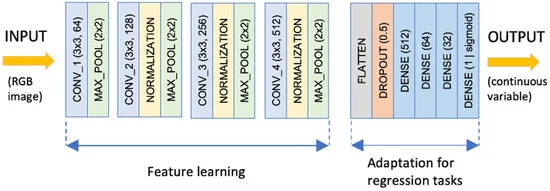
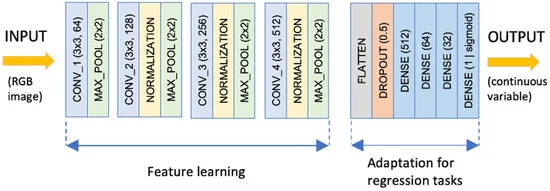

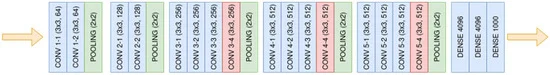
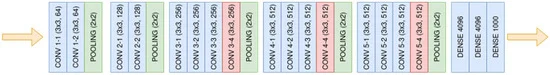

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Multiply, UpSampling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

# VGG16 Feature Extraction (without fully connected layers)
def VGG16_Feature_Extraction(inputs):
    # Block 1
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    return x

# Regression Output Layer
def Regression_Layer(feature_maps):
    x = Flatten()(feature_maps) 
    x = Dropout(0.5)(x) 
    x = Dense(512)(x) 
    x = Activation('relu')(x)
    x = Dense(64)(x) 
    x = Activation('relu')(x)
    output = Dense(1)(x)  
    x = Activation('linear')(x)
    return output

# Build Full Model
def VGG16_Regression(input_shape=(256, 256, 3)):
    inputs = Input(shape=input_shape)
    
    extracted_features = VGG16_Feature_Extraction(inputs)
    regression_output = Regression_Layer(extracted_features)

    model = Model(
        inputs=inputs, 
        outputs=regression_output)
    
    return model

# Create model
model = VGG16_Regression()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 31,525,313 (120.26 MB)

 Trainable params: 31,525,313 (120.26 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import os
import pandas as pd

# Define dataset paths
base_path = "/kaggle/input/hc18-preprocessed-data/split/split"
csv_path = os.path.join(base_path, "/kaggle/input/hc18-preprocessed-data/training_set_pixel_size_and_HC.csv")

# Read the CSV file
df = pd.read_csv(csv_path)

# Define image directories
image_dirs = {
    "train": os.path.join(base_path, "train_image"),
    "valid": os.path.join(base_path, "valid_image"),
    "test": os.path.join(base_path, "test_image")
}


# Function to find the full image path
def find_image_path(filename):
    for split, img_dir in image_dirs.items():
        img_path = os.path.join(img_dir, filename)
        if os.path.exists(img_path):
            return img_path, split  # Return path and split type
    return None, None

# Apply function to get image paths and dataset splits
df["image_path"], df["split"] = zip(*df["filename"].apply(find_image_path))

# Drop entries with missing image paths (if any)
df = df.dropna(subset=["image_path"])

# Save merged dataset
df.to_csv("/kaggle/working/merged_dataset.csv", index=False)


Merged dataset saved successfully.


In [3]:
df2 = pd.read_csv('/kaggle/working/merged_dataset.csv')
df2

,filename,pixel size(mm),head circumference (mm),image_path,split
0,000_HC.png,0.069136,44.30,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
1,001_HC.png,0.089659,56.81,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
2,002_HC.png,0.062033,68.75,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
3,003_HC.png,0.091291,69.00,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
4,004_HC.png,0.061240,59.81,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
...,...,...,...,...,...
994,801_HC.png,0.296851,329.26,/kaggle/input/hc18-preprocessed-data/split/spl...,test
995,802_HC.png,0.212267,330.90,/kaggle/input/hc18-preprocessed-data/split/spl...,test
996,803_HC.png,0.202743,331.70,/kaggle/input/hc18-preprocessed-data/split/spl...,test
997,804_HC.png,0.281090,316.48,/kaggle/input/hc18-preprocessed-data/split/spl...,test


In [4]:
Train = df2[df2['split'] == 'train']
Train

,filename,pixel size(mm),head circumference (mm),image_path,split
160,128_HC.png,0.102594,94.31,/kaggle/input/hc18-preprocessed-data/split/spl...,train
161,129_HC.png,0.129840,98.72,/kaggle/input/hc18-preprocessed-data/split/spl...,train
162,130_HC.png,0.114777,96.80,/kaggle/input/hc18-preprocessed-data/split/spl...,train
163,131_HC.png,0.079851,98.37,/kaggle/input/hc18-preprocessed-data/split/spl...,train
164,132_HC.png,0.128235,86.96,/kaggle/input/hc18-preprocessed-data/split/spl...,train
...,...,...,...,...,...
795,645_HC.png,0.202062,194.60,/kaggle/input/hc18-preprocessed-data/split/spl...,train
796,646_HC.png,0.151039,208.91,/kaggle/input/hc18-preprocessed-data/split/spl...,train
797,647_HC.png,0.202060,220.90,/kaggle/input/hc18-preprocessed-data/split/spl...,train
798,648_2HC.png,0.147688,215.46,/kaggle/input/hc18-preprocessed-data/split/spl...,train


In [5]:
test = df2[df2['split'] == 'test']
test

,filename,pixel size(mm),head circumference (mm),image_path,split
800,649_HC.png,0.137469,218.70,/kaggle/input/hc18-preprocessed-data/split/spl...,test
801,650_HC.png,0.213177,201.90,/kaggle/input/hc18-preprocessed-data/split/spl...,test
802,651_HC.png,0.149010,214.00,/kaggle/input/hc18-preprocessed-data/split/spl...,test
803,652_2HC.png,0.162852,222.28,/kaggle/input/hc18-preprocessed-data/split/spl...,test
804,652_HC.png,0.163501,219.09,/kaggle/input/hc18-preprocessed-data/split/spl...,test
...,...,...,...,...,...
994,801_HC.png,0.296851,329.26,/kaggle/input/hc18-preprocessed-data/split/spl...,test
995,802_HC.png,0.212267,330.90,/kaggle/input/hc18-preprocessed-data/split/spl...,test
996,803_HC.png,0.202743,331.70,/kaggle/input/hc18-preprocessed-data/split/spl...,test
997,804_HC.png,0.281090,316.48,/kaggle/input/hc18-preprocessed-data/split/spl...,test


In [6]:
valid = df2[df2['split'] == 'valid']
valid

,filename,pixel size(mm),head circumference (mm),image_path,split
0,000_HC.png,0.069136,44.30,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
1,001_HC.png,0.089659,56.81,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
2,002_HC.png,0.062033,68.75,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
3,003_HC.png,0.091291,69.00,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
4,004_HC.png,0.061240,59.81,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
...,...,...,...,...,...
155,125_HC.png,0.064738,88.51,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
156,126_2HC.png,0.059636,85.44,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
157,126_3HC.png,0.059488,82.93,/kaggle/input/hc18-preprocessed-data/split/spl...,valid
158,126_HC.png,0.059441,79.53,/kaggle/input/hc18-preprocessed-data/split/spl...,valid


In [7]:
import cv2
# Data Loader
def DataLoader(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR to RGB
    image = image/255.0
    # Many works need to resize the image, but the dataset has already resized for us => no need
    return image

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

# Get images and labels
X = np.array([DataLoader(path) for path in df["image_path"]])
y = np.array(df["head circumference (mm)"])  # Target labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split test set into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")


Training: (799, 256, 256, 3), Validation: (100, 256, 256, 3), Test: (100, 256, 256, 3)


In [9]:
from tensorflow.keras.optimizers import Adam
# Compile Model
model = VGG16_Regression()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# # Print Summary
# model.summary()

from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100, batch_size=32,  # Reduce batch size if needed
    callbacks=[early_stopping]
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - loss: 23514.8867 - mae: 130.7274 - val_loss: 7159.0913 - val_mae: 62.8187
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step - loss: 6853.5664 - mae: 65.6184 - val_loss: 8431.9834 - val_mae: 74.0325
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - loss: 6658.5225 - mae: 63.4832 - val_loss: 4303.1606 - val_mae: 47.7346
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - loss: 4151.6201 - mae: 47.0470 - val_loss: 4844.9082 - val_mae: 55.2334
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - loss: 4294.4390 - mae: 50.9941 - val_loss: 3692.6953 - val_mae: 44.0346
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - loss: 3715.3484 - mae: 44.7499 - val_loss: 4799.1895 - val_mae: 58.2385
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - loss: 4077.7612 - mae: 51.2002 - val_loss: 3077.4634 - val_mae: 41.0821
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - loss: 3633.4539 - mae: 46.6959 - val_loss: 2889.3940 - v

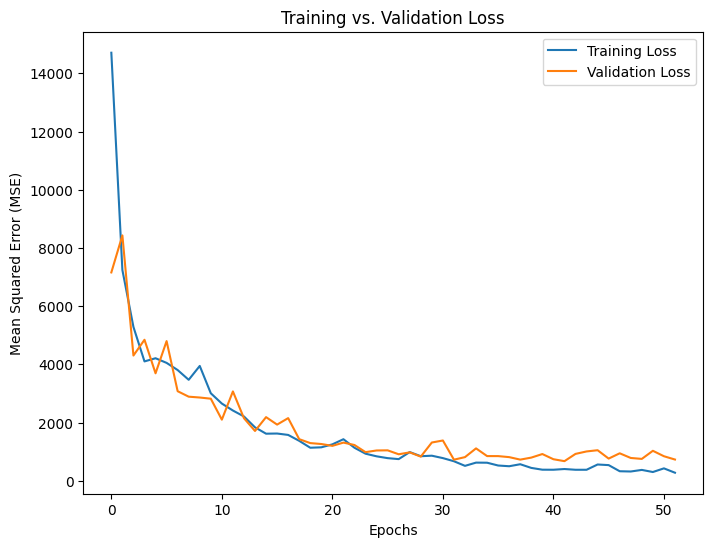

In [10]:
import matplotlib.pyplot as plt

# Extract loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score on Test Data: {r2:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
R² Score on Test Data: 0.8686
